# Lotka–Volterra equations

* parametry funkce: 
    - __x__: populace kořisti
    - __y__: populace predátora
    - __alpha__: míra růstu kořisti
    - __beta__: míra predace
    - __delta__: efektivita predátora při získávání potravy
    - __gamma__: úmrtnost predátora
    - __t__: čas (může být libovolný, rovnice jsou autonomní)


## Upravená rovnice pro 3 druhy
- pro tři druhy se rovnice musí upravit aby fungovalo dobře a úprava rovnice záleží na tom kolik budu brát predátorů a kolik kořistí.



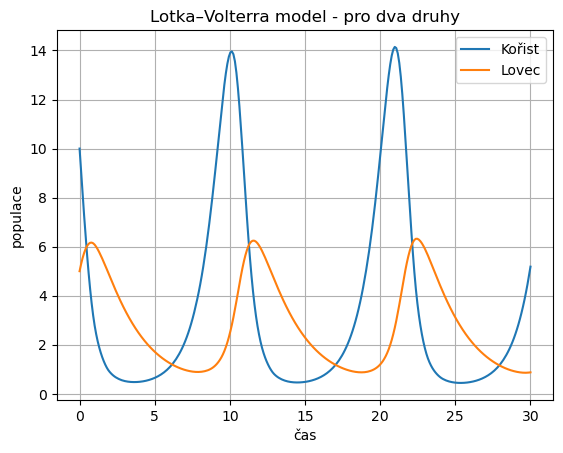

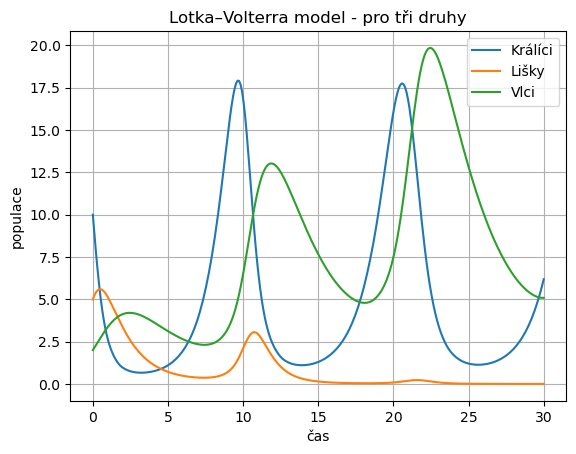

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

alpha = 1.1   # růstová míra kořisti
beta = 0.4    # míra predace
gamma = 0.4   # úmrtnost predátora
delta = 0.1   # efektivita přeměny kořisti v predátora

z0 = [10, 5]


t_span = (0, 30)
t_eval = np.linspace(*t_span, 300)


def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

sol = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label="Kořist")
plt.plot(sol.t, sol.y[1], label="Lovec")
plt.xlabel("čas")
plt.ylabel("populace")
plt.legend()
plt.title("Lotka–Volterra model - pro dva druhy")
plt.grid(True)
plt.show()

## ------------------------------------------------------------------------------------------------

alpha = 1.1   # růstová míra králíků
beta = 0.4    # predace lišek na králících
mu = 0.1      # predace vlků na králících
delta = 0.1   # efektivita přeměny králíků na lišky
gamma = 0.4   # úmrtnost lišek
eta = 0.05    # predace vlků na liškách
theta = 0.1   # efektivita přeměny lišek na vlky
lmbda = 0.05  # efektivita přeměny králíků na vlky
sigma = 0.3   # úmrtnost vlků

z0 = [10, 5, 2]  # [králíci, lišky, vlci]

t_span = (0, 30)
t_eval = np.linspace(*t_span, 300)


# zde jsem na internetu našel že rovnice musí být trochu jiná pro případ že chci aby v ní účinkovali tři živočišné druhy. 
# takže jsem ji náležitě upravil pro moje nové potřeby, nově zde účinkuje více proměných. 
# Mám zde dva predátory a jednu kořist
def lotka_volterra_three_species(t, z):
    x, y, w = z
    dxdt = alpha * x - beta * x * y - mu * x * w
    dydt = delta * x * y - gamma * y - eta * y * w
    dwdt = theta * y * w + lmbda * x * w - sigma * w
    return [dxdt, dydt, dwdt]

sol = solve_ivp(lotka_volterra_three_species, t_span, z0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0], label="Králíci")
plt.plot(sol.t, sol.y[1], label="Lišky")
plt.plot(sol.t, sol.y[2], label="Vlci")
plt.xlabel("čas")
plt.ylabel("populace")
plt.legend()
plt.title("Lotka–Volterra model - pro tři druhy")
plt.grid(True)
plt.show()



- Z informací co jsem našel jsem zjistil že když v grafu vzniká takové "cyklické" chování je dost pravděpodobně správné jelikož logicky při zvýšené populaci predátorů začnou zanikat kořisti a tím pádem potom začnou zanikat predátoři protože namají tolik potravy a pak se cyklus začne opakovat.
